# Segmentation

## Let’s get to work!

In [1]:
import os


from torch import nn, cuda
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()
# NOTE: when referring to a CUDA device, torch will only know about visible devices
#       so while currently we will be using gpu05
#       this will be device `cuda:0`

Number of visible CUDA devices: 1


True

### Model: U-Net

Ronneberger, Fischer, Brox: [U-Net: convolutional networks for biomedical image segmentation](https://arxiv.org/abs/1505.04597)

#### Architecture

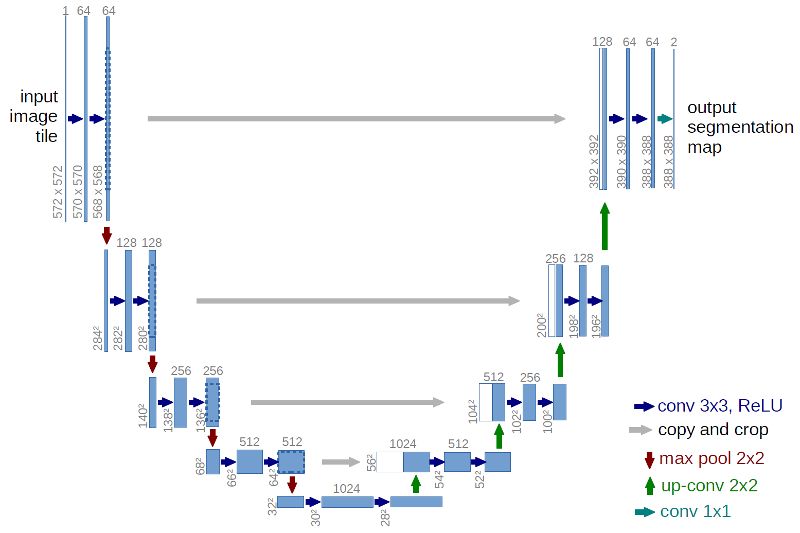

#### Loading the data

In [ ]:
from data.dataset import load_data
train_dl, val_dl = load_data('../../data/covidqu/')

FileNotFoundError: [Errno 2] No such file or directory: '../data/covidqu/imgs.npy'

With CPU: 4m 12s


With CUDA: 3m 6s

In [3]:
from src.models.unet import UNet
from src.training.metrics import DiceLoss
from src.training.train import train
from torch import optim

model = UNet()
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 1e-4)

batch_scores, train_scores, val_scores = train(model, loss, optimizer, train_dl, val_dl, num_epochs = 1, accum_scale = 4)

d:\01_AdatMat_Elte\03_THESIS\concrete_crack_thesis\venv\Lib\site-packages\torch\nn\modules\conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv2d(


In [22]:
print('Train Dice score: {:.2f}'.format(*train_scores))
print('Validation Dice score: {:.2f}'.format(*val_scores))

Train Dice score: 0.43
Validation Dice score: 0.39


In [ ]:
#torch.save(model, './models/covidqu_unet_test')

In [37]:
model_saved = torch.load('./models/covidqu_unet_test', weights_only=False)

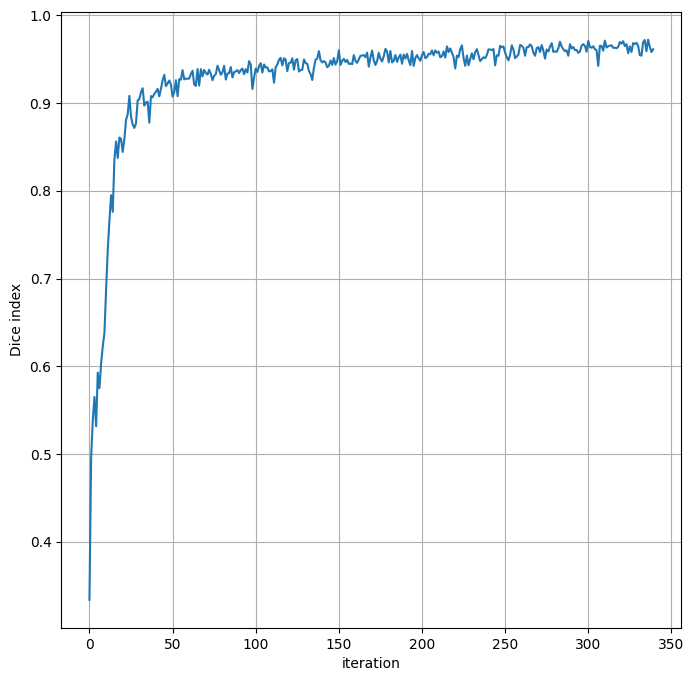

In [34]:
plt.figure(figsize = (8, 8))
plt.plot(batch_scores)
plt.grid()

plt.xlabel('iteration')
plt.ylabel('Dice index')
plt.show()

In [40]:
import time
t = time.time()
# do stuff
elapsed = time.time() - t
print(elapsed)

0.0


0.6632647514343262
0.6353046894073486
0.6146085262298584
0.5954136848449707
0.5854387283325195


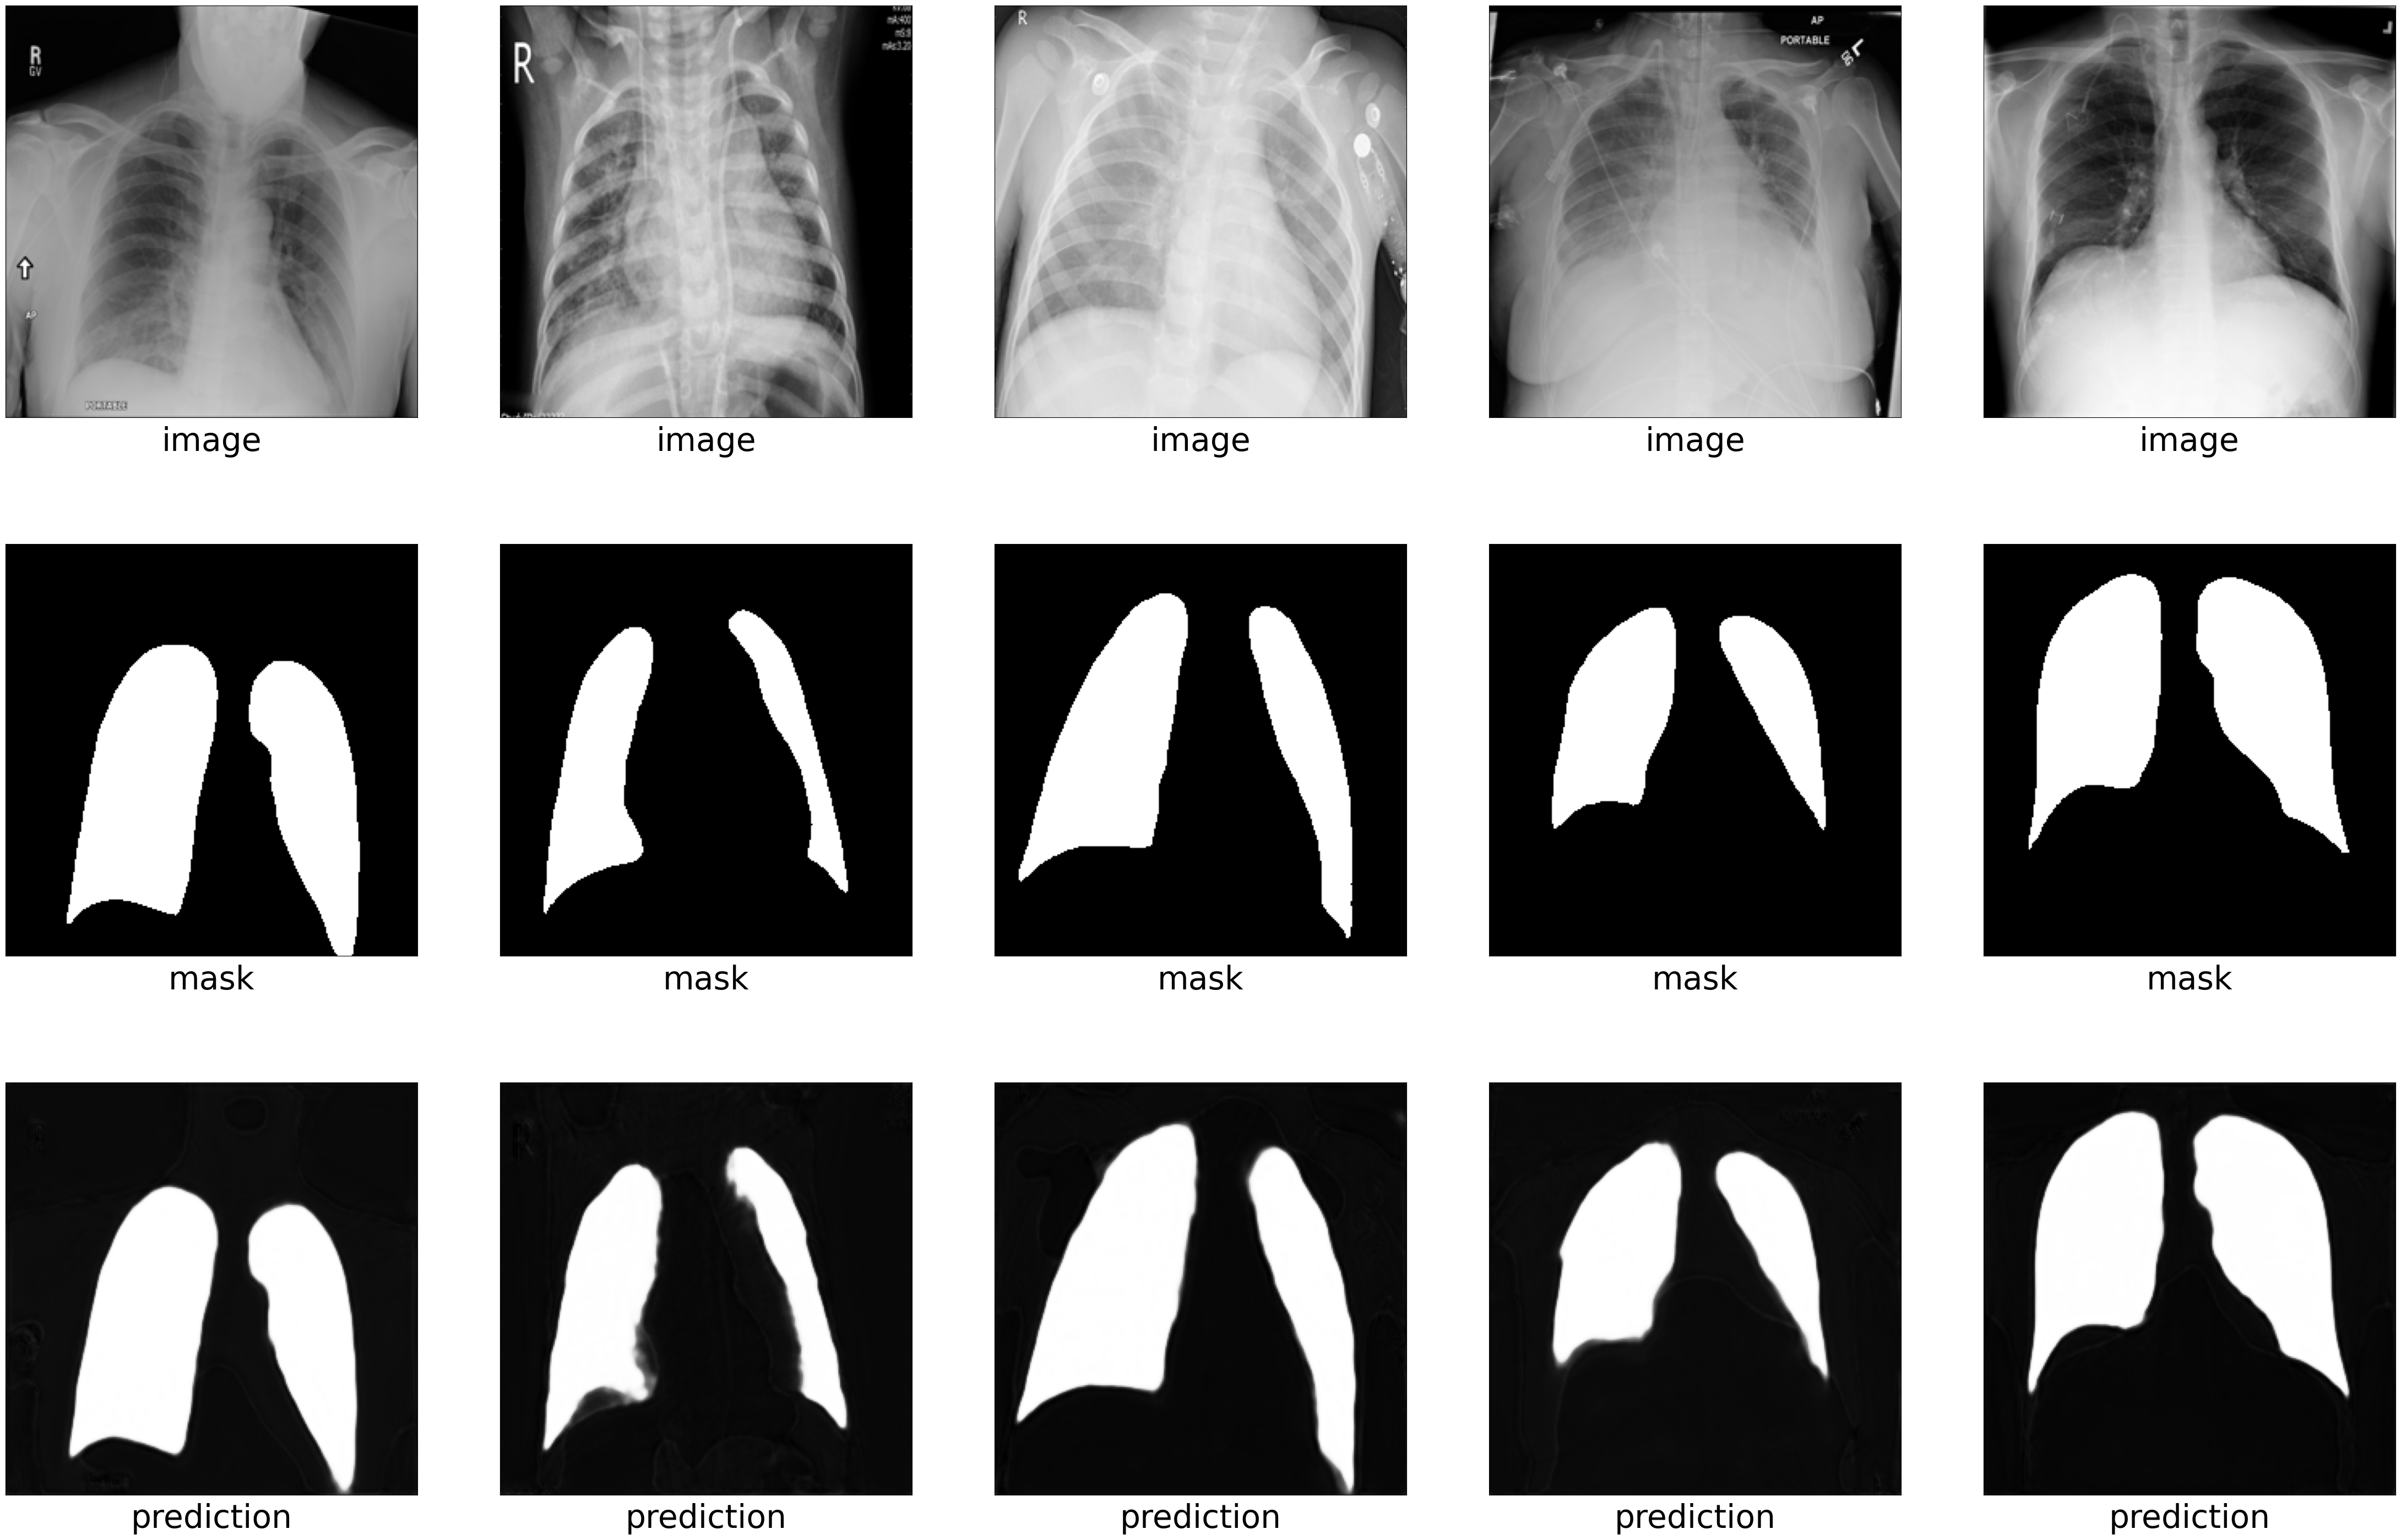

In [41]:
# visualising model predictions
fig = plt.figure(figsize = (56, 36))
for i in range(5):
    img, mask = val_ds[i].values()

    subplot = fig.add_subplot(3, 5, i + 1)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('image', size = 42)
    plt.imshow(img.squeeze(), cmap = 'gray')

    subplot = fig.add_subplot(3, 5, i + 6)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('mask', size = 42)
    plt.imshow(mask.squeeze(), cmap = 'gray')
    t = time.time()
    with torch.no_grad():
        pred = model_saved(img.to('cpu').reshape((1, *img.shape)))
    elapsed = time.time() - t
    print(elapsed)
    subplot = fig.add_subplot(3, 5, i + 11)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('prediction', size = 42)
    plt.imshow(pred.cpu().squeeze(), cmap = 'gray')